In [1]:
#library imports
import numpy as np
import random
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import datasets
from urllib.request import urlopen
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Problem 1 : Linear classification using features

In this problem, we will look into a dataset which is hard to resolve using linear classification, but is easier to solve with the using kernels.

In particular, we will sample data from two concentric circles with different radius and attempt to classify them using linear classification in the feature space.

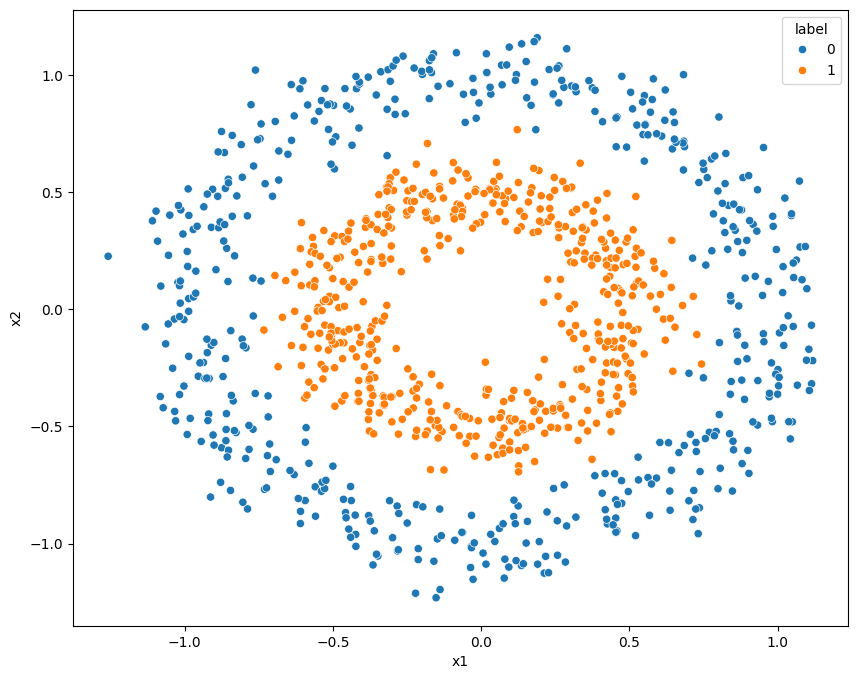

In [2]:
# generate a dataset with 1000 examples

np.random.seed(42)

n_samples = 1000
X, Y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.1)

circles = pd.DataFrame({'x1': X[:, 0], 'x2': X[:, 1], 'label': Y})
# Let us look how the data looks like in the feature space x1, x2

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax = sns.scatterplot(x='x1', y='x2', hue='label', data=circles)

In [3]:
cols = list(circles.columns)
cols.remove('label')
X = pd.DataFrame(circles, columns=cols).values
Y = pd.DataFrame(circles, columns=['label']).values

# Split the dataset into training and testing
split_fraction = 0.8
split = int(split_fraction*n_samples)

X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

### 1(a): Implement logistic regression in NumPy to classify the above data.


Feel free to use solution from the previous assignment

In [4]:
np.random.seed(1)
regressor = LogisticRegression(max_iter=100)

K = 1
d_in = 2

w = np.random.rand(d_in)
b = np.random.rand(K)

lr = 1e-3
num_iter = 200


def sigmoid(z):
    return 1./(1.+np.exp(-z))


def loss(w, b, x, y):
    logits = w@x+b
    q = sigmoid(logits)
    return -y * np.log(q) - (1-y) * (1-np.log(q))


def loss_grad(w, b, x, y):
    logits = w@x + b
    q = sigmoid(logits)
    grad_w = (q-y)*x
    grad_b = q - y
    return grad_w, grad_b


# losses = []
for n in range(num_iter):
    for i in range(len(X_train)):
        # stochastic gradient
        grad_w, grad_b = loss_grad(w, b, X_train[i], Y_train[i])
        w = w - lr * grad_w
        b = b - lr * grad_b

    # losses.append([n+1, np.mean(np.array([loss(w, b, X_train[i], Y_train[i]) for i in range(len(X_train))]))])
    '''
    if n%100==0:
        print(f"Epoch: {n+1}, Loss: {np.mean(np.array([loss(w, b, X[i], Y[i]) for i in range(len(X))]))} ")
        #print(w, b)
    '''


def loss01(w, b, x, y):
    pred = np.array(list(map(lambda z: np.sign(w@z+b[0]), x)))/2+0.5

    return (y == pred).astype(float).mean()


# fit the training data
regressor.fit(X_train, Y_train.squeeze())

train_accuracy = regressor.score(X_train, Y_train.squeeze())
test_accuracy = regressor.score(X_test, Y_test.squeeze())


########################### TO BE GRADED #######################################

# estimate the training and test accuracy
train_accuracy = regressor.score(X_train, Y_train)

test_accuracy = regressor.score(X_test, Y_test)

print(
    f'Train accuracy: {train_accuracy:0.4f}, Test accuracy: {test_accuracy:0.4f}')

train_accuracy_np = loss01(w, b, X_train, Y_train)
test_accuracy_np = loss01(w, b, X_test, Y_test)

print(f'numpy train accuracy: {train_accuracy_np:0.2f}')
print(f'numpy test accuracy: {test_accuracy_np:0.2f}')

################################################################################

# use W, b to estimate the prediction boundary
W = regressor.coef_.T
b = regressor.intercept_

Train accuracy: 0.5350, Test accuracy: 0.4350
numpy train accuracy: 0.50
numpy test accuracy: 0.50


We observe a classification accuracy of about 50\%, which is basically random guesssing.

Next, we will solve the same problem but by defining our own features.

Consider a two degree polynomial as a feature function

$$ \phi(x_1, x_2) = \begin{bmatrix} 1 \\ x_1 \\ x_2 \\ x_1^2 \\ x_2^2 \\ x_1 x_2 \end{bmatrix} $$

In this feature space, the two circles are separable (using the radius of the circles).

### 1(b): Implement linear classification using NumPy in the feature space defined by the above feature function.
Feel free to use either the exact solution or optimization one.

In [5]:
# Create a dataset including the above features

# Feel free to do the implement without pandas dataframe

cols = list(circles.columns)
cols.remove('label')
X = pd.DataFrame(circles, columns=cols).values
Y = pd.DataFrame(circles, columns=['label']).values

# Split the dataset into training and testing
split_fraction = 0.8
split = int(split_fraction*n_samples)

X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

In [6]:
# Implement linear classification in feature space
np.random.seed(1)


def features(x):
    return np.array([x[0], x[1], x[0]**2, x[1]**2, x[0]*x[1]])


K, d_in = 1, 5

w, b = np.random.rand(d_in), np.random.rand(K)

lr = 1e-2
num_iter = 200


def sigmoid(z):
    return 1./(1.+np.exp(-z))


def loss(w, b, x, y):
    logits = w @ features(x)+b
    q = sigmoid(logits)
    return -y * np.log(q) - (1-y) * (1-np.log(q))


def loss_grad(w, b, x, y):
    logits = w @ features(x) + b
    q = sigmoid(logits)
    grad_w = (q-y) * features(x)
    grad_b = q - y
    return grad_w, grad_b


# Plot the training loss as a function of number of steps
losses = []
for n in range(num_iter):
    for i in range(len(X_train)):
        # stochastic gradient
        grad_w, grad_b = loss_grad(w, b, X_train[i], Y_train[i])
        w = w - lr * grad_w
        b = b - lr * grad_b

    losses.append(
        [n+1, np.mean(np.array([loss(w, b, X[i], Y[i]) for i in range(len(X))]))])
    '''
    if n%100==0:
        print(f"Epoch: {n+1}, Loss: {np.mean(np.array([loss(w, b, X[i], Y[i]) for i in range(len(X))]))} ")
        #print(w, b)
    '''


def loss01(w, b, x, y):
    pred = np.array(list(map(lambda z: np.sign(w@features(z)+b[0]), x)))/2+0.5

    return (y == pred).astype(float).mean()

########################### TO BE GRADED #######################################


# estimate the training and test accuracy
train_accuracy = loss01(w, b, X_train, Y_train.reshape(len(Y_train)))
test_accuracy = loss01(w, b, X_test, Y_test.reshape(len(Y_test)))


print(
    f'Train accuracy: {train_accuracy:0.4f}, Test accuracy: {test_accuracy:0.4f}')

Train accuracy: 0.9962, Test accuracy: 0.9900


#### using DataFrame

In [7]:
circles['x1^2'] = circles['x1']**2
circles['x2^2'] = circles['x2']**2
circles['x1x2'] = circles['x1'] * circles['x2']

cols = list(circles.columns)
cols.remove('label')
X = pd.DataFrame(circles, columns=cols).values
Y = pd.DataFrame(circles, columns=['label']).values

# Split the dataset into training and testing
split_fraction = 0.8
split = int(split_fraction*n_samples)

X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]


K, d_in = 1, X_train.shape[-1]

w, b = np.random.rand(d_in), np.random.rand(K)

lr = 1e-2
num_iter = 200


def sigmoid(z):
    return 1./(1.+np.exp(-z))


def loss(w, b, x, y):
    logits = w @ x + b
    q = sigmoid(logits)
    return -y * np.log(q) - (1-y) * (1-np.log(q))


def loss_grad(w, b, x, y):
    logits = w @ x + b
    q = sigmoid(logits)
    grad_w = (q-y) * x
    grad_b = q - y
    return grad_w, grad_b


# Plot the training loss as a function of number of steps
losses = []
for n in range(num_iter):
    for i in range(len(X_train)):
        # stochastic gradient
        grad_w, grad_b = loss_grad(w, b, X_train[i], Y_train[i])
        w = w - lr * grad_w
        b = b - lr * grad_b

    losses.append(
        [n+1, np.mean(np.array([loss(w, b, X[i], Y[i]) for i in range(len(X))]))])
    '''
    if n%100==0:
        print(f"Epoch: {n+1}, Loss: {np.mean(np.array([loss(w, b, X[i], Y[i]) for i in range(len(X))]))} ")
        #print(w, b)
    '''


def loss01(w, b, x, y):
    pred = (np.sign(x @ w.T + b)+1)/2

    return (y == pred).astype(float).mean()

########################### TO BE GRADED #######################################


# estimate the training and test accuracy
train_accuracy = loss01(w, b, X_train, Y_train.reshape(len(Y_train)))
test_accuracy = loss01(w, b, X_test, Y_test.reshape(len(Y_test)))


print(
    f'Train accuracy: {train_accuracy:0.4f}, Test accuracy: {test_accuracy:0.4f}')

Train accuracy: 0.9962, Test accuracy: 0.9900


We observe around 99% accuracy in the feature space. Having the right features makes a big difference.

# Problem 2: Polynomial kernel regression

In this problem, we will use polynomial kernel regression to fit non-linear dependence between inputs and outputs.

First, let us create outputs which have a cubic dependence on the inputs plus some randomness.

$$ y = 2x^3 + 10 +  0.5\eta, $$

where $\eta$ is random noise.

(1000, 1) (1000, 1)


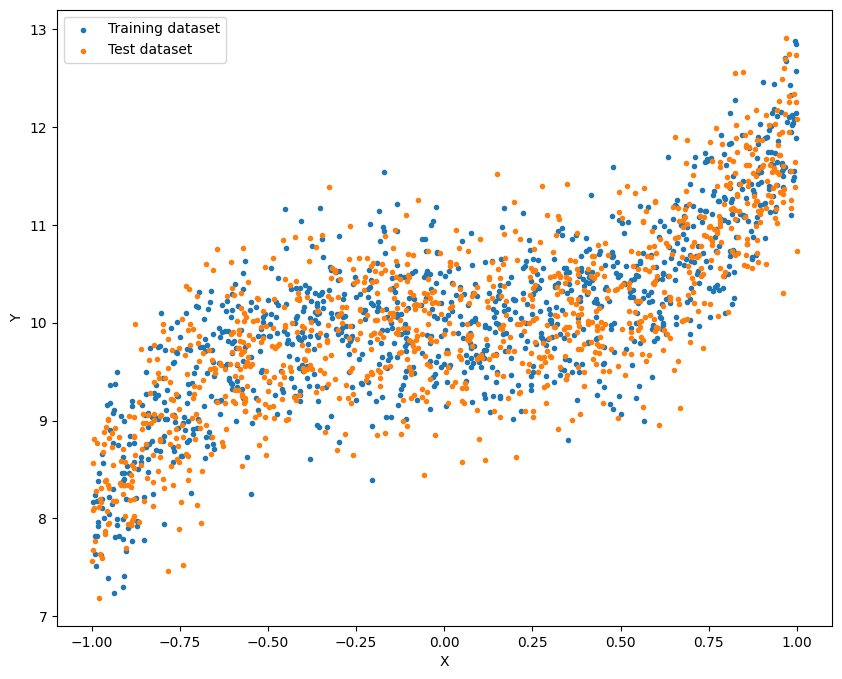

In [8]:
"Generate datset with a cubic relationship between X and Y"


def cubic_func(x, n_samples):
    y = 2*(x**3) + 10
    return y + 0.5*np.random.randn(n_samples, 1)


np.random.seed(43)
N = 1000  # number of training examples
M = 1000  # number of test examples

# Generate training dataset
cubic_X_train = np.random.uniform(low=-1.0, high=1.0, size=(N, 1))
cubic_Y_train = cubic_func(cubic_X_train, N)

# Generate test dataset
cubic_X_test = np.random.uniform(low=-1.0, high=1.0, size=(M, 1))
cubic_Y_test = cubic_func(cubic_X_test, M)
print(cubic_X_train.shape, cubic_Y_train.shape)


fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.scatter(cubic_X_train, cubic_Y_train, label='Training dataset', marker='.')
ax.scatter(cubic_X_test, cubic_Y_test, label='Test dataset', marker='.')
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.legend()

Consider the problem of fitting a polynomial to the above dataset. If we do not know the degree of the polynomial, we can fit a $p$-degree polynomial, denoted by $f_p(x)$, to the problem and study the dependence of performance on the degree $p$. This leads to three cases:

1. $p < 3$: If the degree of the polynomial is less than $3$, then the hypothesis function $f_p(x)$ is too simple to fit the data well. In this case, the model is said to have high bias, meaning that it underfits the data, resulting in poor generalization performance.

2. $p > 3$: If the degree of the polynomial is more than $3$, then the hypothesis function is complex enough to fit the data, but also fits random noise to it. In this case, the model is said to have high variance, meaning that it overfits the data, resulting in poor generalization performance.

3. $p = 3$: Lastly, if the degree of the polynomial is exactly 3, then the complexity of the hypothesis function is just enough to fit the data but not enough to fit random noise. In this case, the model has a balanced tradeoff between bias and variance, resulting in optimal generalization performance.



### 2(a): Fit varying degrees of polynomials to the above data, and plot the test loss as a function of $p$.

Fit up to order $p=10$.

The implementation should be in NumPy. You can use either the exact solution or perform optimization. You are not allowed to use np.polyfit()

[np.float64(0.1896407225158127), np.float64(0.189229543975465), np.float64(0.142702293239276), np.float64(0.14279146724026792), np.float64(0.14345683654447564), np.float64(0.1443736309622245), np.float64(0.14276846658880352), np.float64(0.14290819540810937), np.float64(0.1439053129662632), np.float64(0.14333557198735336)]
The optimal degre of the polynomial is 3.


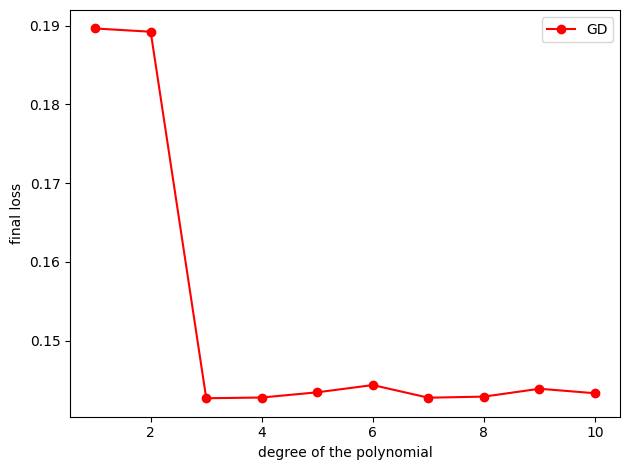

In [9]:
################################# TO BE GRADED #################################

# Implement polynomial regresion
def mse(y, y_preds):
    return 0.5*np.mean((y - y_preds)**2)


x_train, y_train = cubic_X_train, cubic_Y_train
x_test, y_test = cubic_X_test, cubic_Y_test


def f(x, p, w, b):
    xp = x**np.arange(1, p+1)
    return w@xp + b


lr = 1
np.random.seed(0)
final_loss = []

for i in range(1, 11):
    w = np.random.normal(0, 1, (1, i))
    b = np.random.normal(0, 1)

    for j in range(500):
        X = x_train ** np.arange(1, i+1)
        Y_pred = X @ w.T + b

        # Y_pred = np.array(list(map(lambda z: f(z, i, w, b), x_train)))

        grad_w = np.mean((Y_pred - y_train)*X, axis=0)
        grad_b = np.mean((Y_pred - y_train), axis=0)

        # update parameters
        w = w - lr*grad_w
        b = b - lr*grad_b
    Y_pred = np.array(list(map(lambda z: f(z, i, w, b), cubic_X_test)))

    final_loss.append(mse(cubic_Y_test, Y_pred))

print(final_loss)

##################################### TO BE GRADED #############################
# optimal degree of polynomial

opt_p = np.argmin(np.array(final_loss)) + 1

print(f'The optimal degre of the polynomial is {opt_p}.')

##################################### TO BE GRADED #############################

# Plot the test loss against the degree of polynomial

plt.plot(np.arange(1, 11), final_loss, label='GD', color='red', marker='o')


plt.xlabel('degree of the polynomial')
plt.ylabel('final loss')
plt.tight_layout()
plt.legend()
plt.show()

### Exact

The optimal degre of the polynomial is 3.


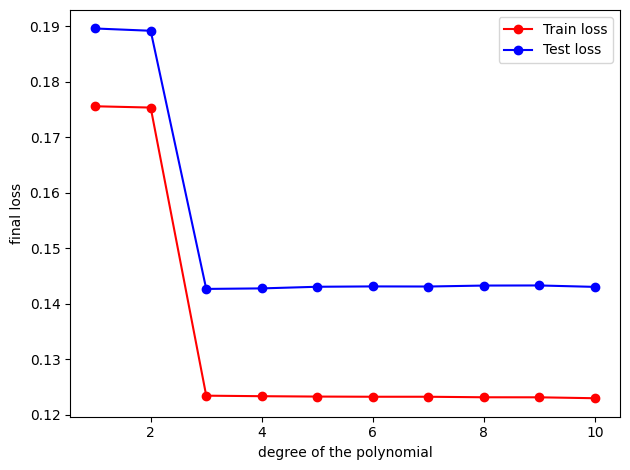

In [10]:
################################# TO BE GRADED #################################

# Implement polynomial regresion
def mse(y, y_preds):
    return 0.5*np.mean((y - y_preds)**2)


class PolynomialRegression:
    def __init__(self, degree):
        self.degree = degree

    def fit(self, X, y):
        n = X.shape[0]
        X_poly = np.ones((n, self.degree+1))

        for i in range(1, self.degree+1):
            X_poly[:, i] = X[:, 0]**i

        self.W = np.linalg.pinv(X_poly.T @ X_poly) @ X_poly.T @ y

    def predict(self, X):
        n = X.shape[0]
        X_poly = np.ones((n, self.degree+1))

        for i in range(1, self.degree+1):
            X_poly[:, i] = X[:, 0]**i

        return X_poly @ self.W


x_train, y_train = cubic_X_train, cubic_Y_train
x_test, y_test = cubic_X_test, cubic_Y_test


train_losses, test_losses = [], []

for i in range(1, 11):
    model = PolynomialRegression(i)

    model.fit(x_train, y_train)
    y_train_preds = model.predict(x_train)
    y_test_preds = model.predict(x_test)

    train_loss = mse(y_train, y_train_preds)
    test_loss = mse(y_test, y_test_preds)

    train_losses.append(train_loss)
    test_losses.append(test_loss)


##################################### TO BE GRADED #############################
# optimal degree of polynomial

opt_p = np.argmin(np.array(test_losses)) + 1

print(f'The optimal degre of the polynomial is {opt_p}.')

##################################### TO BE GRADED #############################

# Plot the test loss against the degree of polynomial

plt.plot(np.arange(1, 11), train_losses,
         label='Train loss', color='red', marker='o')
plt.plot(np.arange(1, 11), test_losses,
         label='Test loss', color='blue', marker='o')


plt.xlabel('degree of the polynomial')
plt.ylabel('final loss')
plt.tight_layout()
plt.legend()
plt.show()

### Scikit-learn

The optimal degre of the polynomial is 3.


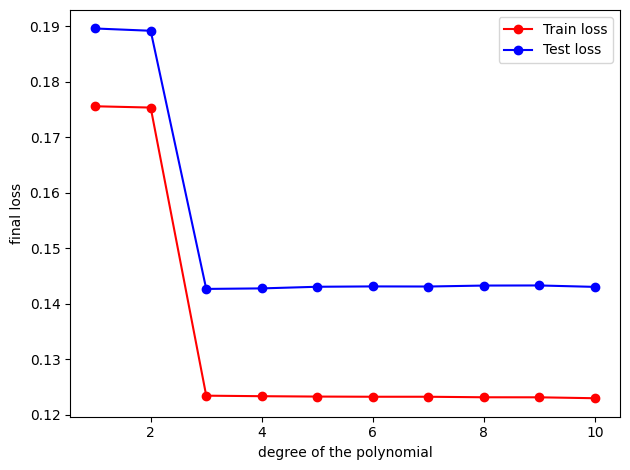

In [11]:
################################# TO BE GRADED #################################
from sklearn.preprocessing import PolynomialFeatures


def mse(y, y_preds):
    return 0.5*np.mean((y - y_preds)**2)


x_train, y_train = cubic_X_train, cubic_Y_train
x_test, y_test = cubic_X_test, cubic_Y_test

train_losses, test_losses = [], []

for p in range(1, 11):

    poly = PolynomialFeatures(degree=p)

    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)

    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    y_train_preds = model.predict(x_train_poly)
    y_test_preds = model.predict(x_test_poly)

    train_loss = mse(y_train, y_train_preds)
    test_loss = mse(y_test, y_test_preds)

    train_losses.append(train_loss)
    test_losses.append(test_loss)


##################################### TO BE GRADED #############################
# optimal degree of polynomial

opt_p = np.argmin(np.array(test_losses)) + 1

print(f'The optimal degre of the polynomial is {opt_p}.')

##################################### TO BE GRADED #############################

# Plot the test loss against the degree of polynomial

plt.plot(np.arange(1, 11), train_losses,
         label='Train loss', color='red', marker='o')
plt.plot(np.arange(1, 11), test_losses,
         label='Test loss', color='blue', marker='o')


plt.xlabel('degree of the polynomial')
plt.ylabel('final loss')
plt.tight_layout()
plt.legend()
plt.show()

# Problem 3: Kernel regression using RBF kernel and Random Fourier features



Let us cook up a dataset with periodic relationship between the input and output. In particular, we will generate outputs using sine function

$$ y = \sin(x) + 0.2 ϵ ,$$

where $\epsilon$ is random noise added to the periodic relationship.

Text(0, 0.5, '$y$')

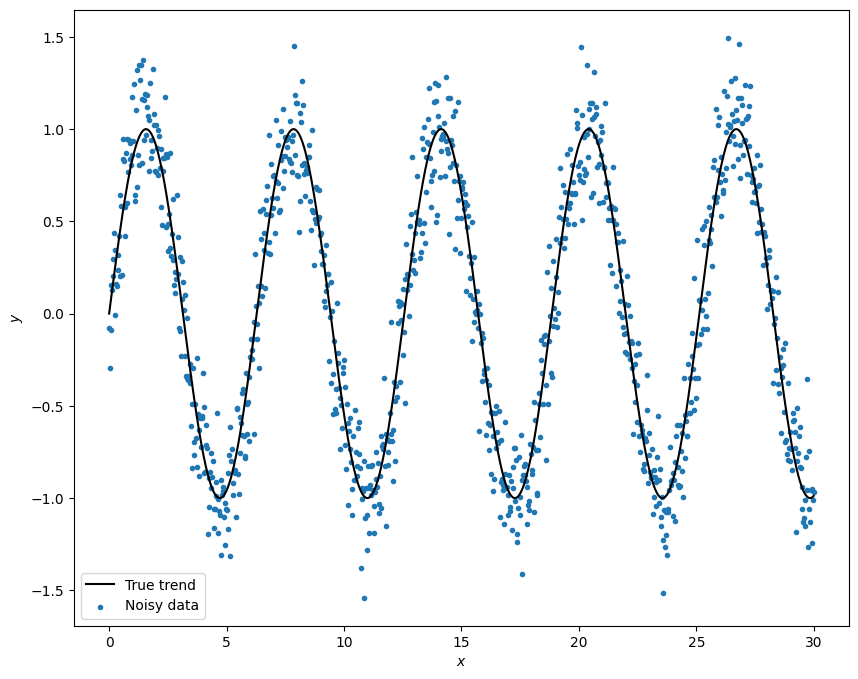

In [12]:
# Generate data
inputs = np.linspace(0, 30, num=1000).reshape(-1, 1)
true_targets = np.sin(inputs)
targets = true_targets + 0.2 * np.random.normal(size=true_targets.shape)

# Plot the true trend and the data
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(inputs, true_targets, label='True trend', color='black')
ax.scatter(inputs, targets, label='Noisy data', marker='.')
ax.legend()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

First, we would like to highlight the limitations of a linear model given our dataset.

Task: Fit a linear model and plot predictions.

Text(0, 0.5, '$y$')

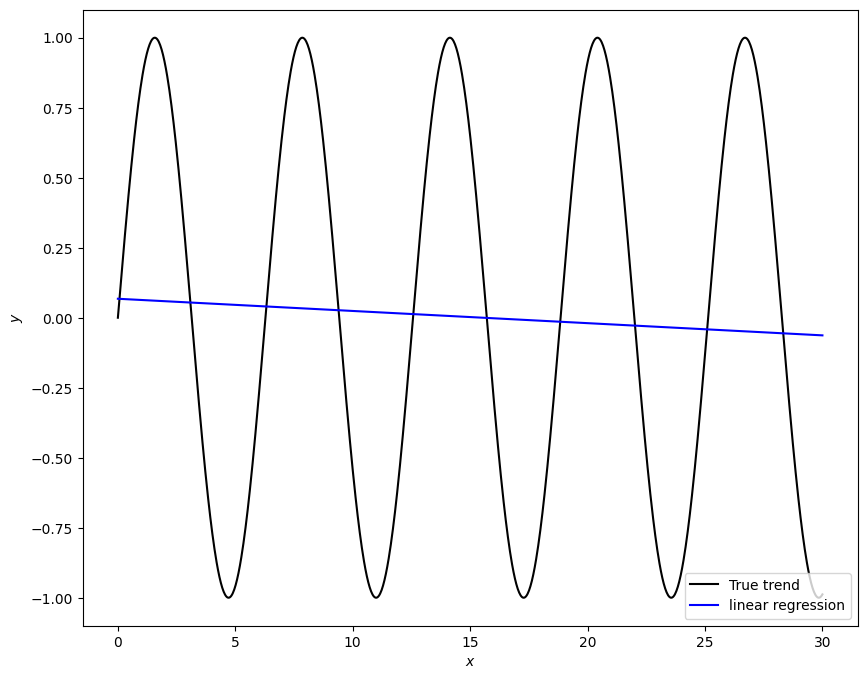

In [13]:
################################# TO BE GRADED #################################
# Fit a linear model

def mse_loss(y_hat, y):
    "MSE loss"
    return 0.5*np.mean((y_hat - y)**2)


w = np.random.normal(0, 1)
b = np.random.normal(0, 1)

# Pick some learning rate to start
lr = 1e-03

num_iter = 1000

for n in range(num_iter):

    # Compute the loss
    loss_step = mse_loss(w * inputs + b, targets)

    # Compute gradient of loss with respect to w and b:

    grad_w = np.mean(inputs * (w * inputs + b - targets))
    grad_b = np.mean(w*inputs + b - targets)

    # update parameters
    w = w - lr*grad_w
    b = b - lr*grad_b


################################# TO BE GRADED #################################
# Plot the predictions against the true trend

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.plot(inputs, true_targets, color='black', label='True trend')
ax.plot(inputs, w*inputs + b, color="blue", label="linear regression")
ax.legend()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

## 3(a) In this problem, we will use the Radius basis function (RBF) kernel to predict a periodic signal.

The RBF kernel is defined as

$$ K(x, x') = \exp \left( - \frac{\| x - x' \|^2}{2 \sigma^2} \right), $$

where $\sigma$ is a tunable parameter called bandwidth.

Next, let us perform kernel regression using the RBF kernel to fit the periodic data.

Feel free to use either the exact solution or perform optimization, but the implementation should be in NumPy only.

You can use sklearn kernel methods to verify your results.

Text(0, 0.5, '$y$')

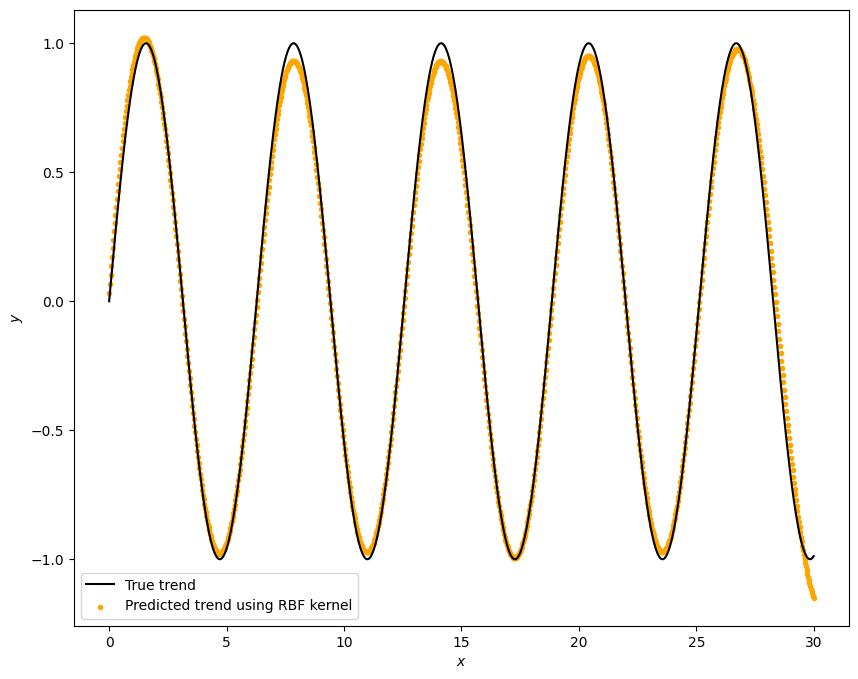

In [14]:
################################# TO BE GRADED #################################
# Implement kernel regression using the RBF kernel

def RBF(x, xp, sigma=1):
    return np.exp(-np.linalg.norm(x-xp)**2/(2*sigma**2))


rbf = np.array([RBF(x, y, 3) for x in inputs for y in inputs]
               ).reshape(len(inputs), len(inputs))


def predict(xt, yt, lamda=1):
    # kx = np.array(list(map(lambda z: RBF(z, x), xt)))

    return yt.T @ np.linalg.pinv(rbf + lamda * np.identity(len(xt))) @ rbf

# predictions = np.array(list(map(lambda z: predict(z, inputs, targets), inputs)))


predictions = predict(inputs, targets, lamda=0.1)

# targets.T@ np.linalg.inv(rbf + 0.0001 * np.identity(len(inputs))) @ rbf

################################# TO BE GRADED #################################
# Plot the predictions against the true trend
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.plot(inputs, true_targets, color='black', label='True trend')
plt.scatter(inputs, predictions, color='orange', marker='.',
            label='Predicted trend using RBF kernel')
ax.legend()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

### scikit-learn

Text(0, 0.5, '$y$')

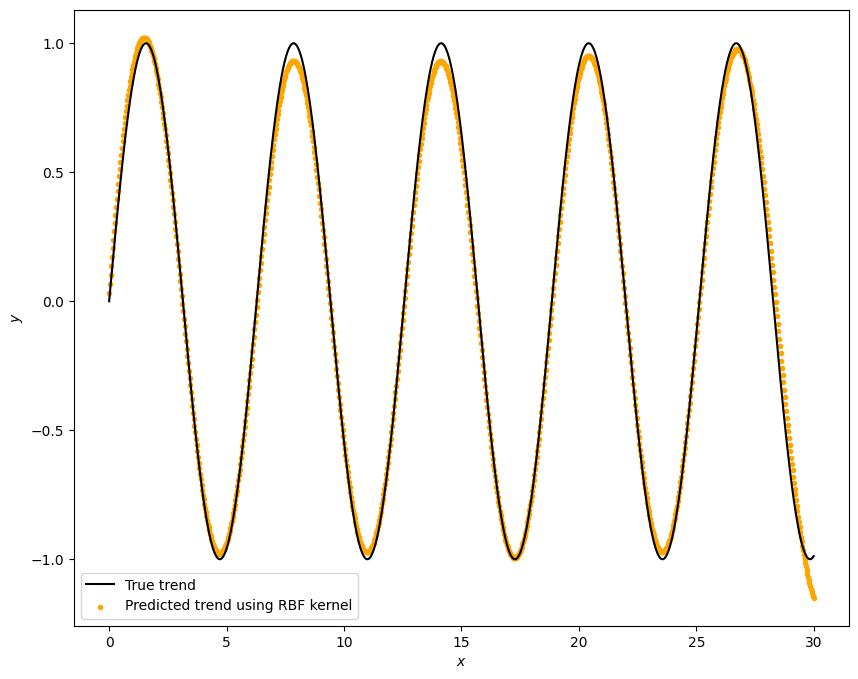

In [15]:
################################# TO BE GRADED #################################
# Implement kernel regression using the RBF kernel

from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process.kernels import RBF

kernel_ridge = KernelRidge(kernel=RBF(length_scale=3), alpha=0.1)
kernel_ridge.fit(inputs, targets)


predictions = kernel_ridge.predict(inputs)

# targets.T@ np.linalg.inv(rbf + 0.0001 * np.identity(len(inputs))) @ rbf

################################# TO BE GRADED #################################
# Plot the predictions against the true trend
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.plot(inputs, true_targets, color='black', label='True trend')
plt.scatter(inputs, predictions, color='orange', marker='.',
            label='Predicted trend using RBF kernel')
ax.legend()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

## 3(b) Random Fourier Features (RFF)

In this problem, we will use Random Fourier Features to fit the noisy sine signal above. Consider the RBF kernel as above. The fourier transform of the RBF kernel is given by

$$ p(\omega) = \frac{1}{(2 \pi)^{D/2} } \exp \left( - \frac{\|\omega\|^2}{2} \right),$$

where $\omega \in \mathbb{R}^d$ (same as inputs) and $D$ is the number of frequencies drawn.



Refer to Section 1.6 of the Feature space and kernel methods notes if required.

Text(0, 0.5, '$y$')

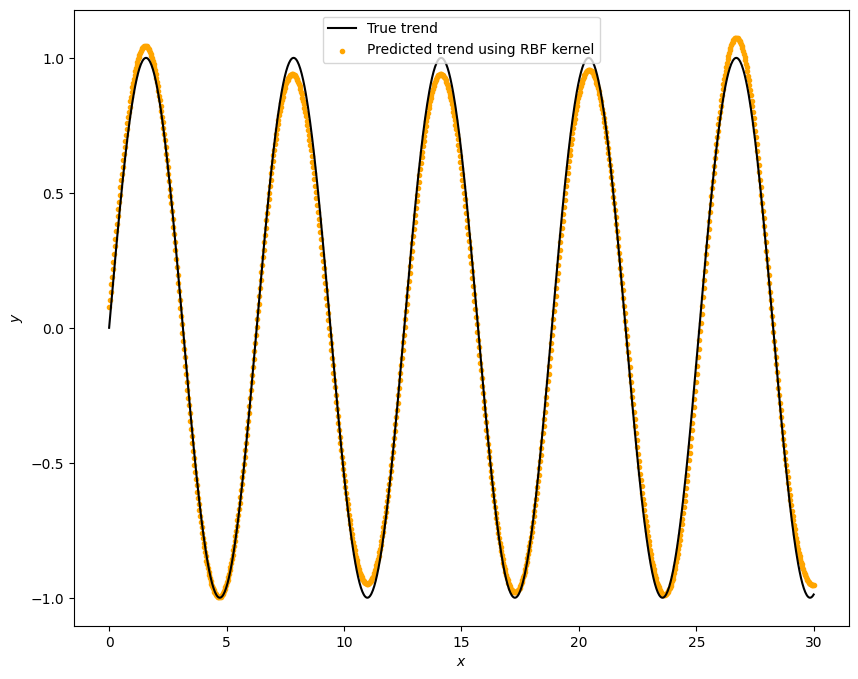

In [16]:
# number of frequencies to sample from the probablity distribution.
D = 20  # modify if required

np.random.seed(42)

ws = np.random.normal(0, 1, (1, D))

'''
def Kernel(x, xp, ws):
    return np.mean(np.array([np.cos(w*(x-xp)) for w in ws]))


rbf = np.array([Kernel(x, y, ws) for x in inputs for y in inputs]
               ).reshape(len(inputs), len(inputs))
predictions = targets.T @ np.linalg.inv(rbf +
                                        1.0 * np.identity(len(inputs))) @ rbf
'''

kernel = np.mean(np.cos(inputs[:, None, :] @ ws) * np.cos(inputs[None, :, :] @ ws) +
                 np.sin(inputs[:, None, :] @ ws) * np.sin(inputs[None, :, :] @ ws), axis=-1)

predictions = targets.T @ np.linalg.pinv(kernel +
                                         1.0 * np.identity(len(inputs))) @ kernel


################################# TO BE GRADED #################################

# Plot the predictions against the true trend
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.plot(inputs, true_targets, color='black', label='True trend')
plt.scatter(inputs, predictions, color='orange', marker='.',
            label='Predicted trend using RBF kernel')
ax.legend()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

# Problem 4: Weather prediction using kernel regression

In this problem, we will use the RBF kernel to predict the daily temperatures over 10 years (1981-1990) of the city Melbourne in Australia.

The dataset consists of the date and temperature recorded in Celcius. We will fit the training data using kernel regression and predict the future daily temperatures of the test dataset.


Load the training and test datasets.

In [17]:
df_train = pd.read_csv('../datasets/weather/data_train_ByYear.csv', sep = ',')
df_test = pd.read_csv('../datasets/weather/data_valid_ByYear.csv', sep = ',')
print(df_train)

            date  years_since_19850101  temp_deg_C
0     1981-01-01             -4.002740        20.7
1     1981-01-02             -4.000000        17.9
2     1981-01-03             -3.997260        18.8
3     1981-01-04             -3.994521        14.6
4     1981-01-05             -3.991781        15.8
...          ...                   ...         ...
2185  1986-12-27              1.986301        14.6
2186  1986-12-28              1.989041        14.2
2187  1986-12-29              1.991781        13.2
2188  1986-12-30              1.994521        11.7
2189  1986-12-31              1.997260        17.2

[2190 rows x 3 columns]


Plot the daily temperatures against years since 1985 for the training and test datasets.

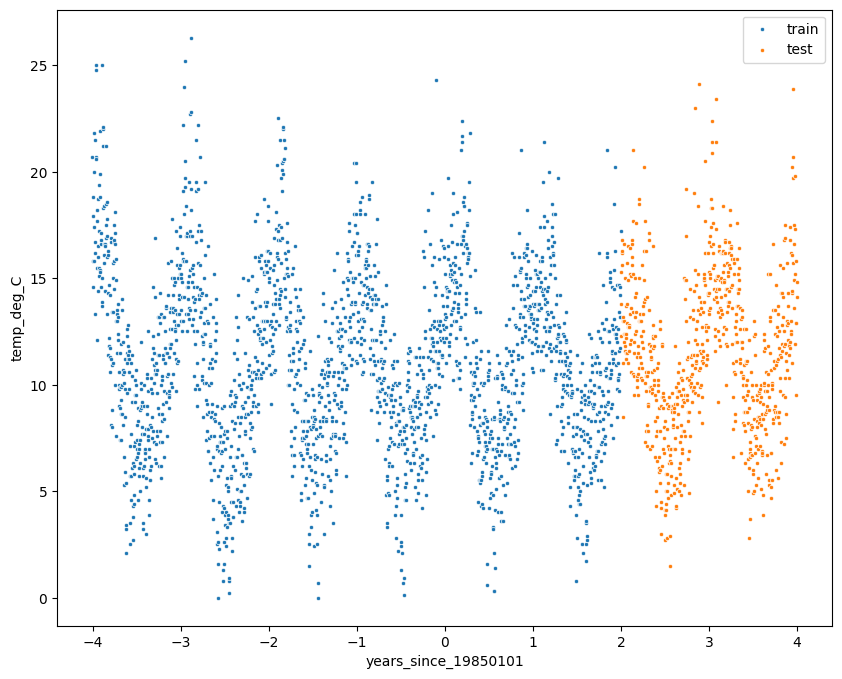

In [18]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
ax = sns.scatterplot(x = 'years_since_19850101', y = 'temp_deg_C', data = df_train, label = 'train', marker = '.')
ax = sns.scatterplot(x = 'years_since_19850101', y = 'temp_deg_C', data = df_test, label = 'test', marker = '.')
x_train = df_train['years_since_19850101'].values.reshape(-1, 1)
y_train = df_train['temp_deg_C'].values

x_test = df_test['years_since_19850101'].values.reshape(-1, 1)
y_test = df_test['temp_deg_C'].values

### 4(a): Fit the training data with kernel regression using RBF kernels, and predict the daily temperatures from the test dataset. The implementation should be in NumPy.


Finally, plot the test loss as a function of the tunable parameters $\sigma$ (bandwidth / length parameter) and $\alpha$ (regularization strength of L2 penalty). Use MSE loss defined below to report the final results. You may find it helpful to plot a heatmap with the color denoting the loss.



In [19]:
x_train.shape, (x_train[:, None, :] - x_train[None, :, :]).shape, y_train.shape, (x_train[:, None, :] - x_test[None, :, :]).shape

((2190, 1), (2190, 2190, 1), (2190,), (2190, 730, 1))

[[1.00000000e-01 1.00000000e-02 6.14010290e+01]
 [1.00000000e-01 5.00000000e-02 6.25950075e+01]
 [1.00000000e-01 1.00000000e-01 6.35170195e+01]
 [5.00000000e-01 1.00000000e-02 7.99357111e+01]
 [5.00000000e-01 5.00000000e-02 5.82667455e+01]
 [5.00000000e-01 1.00000000e-01 5.22805418e+01]
 [1.00000000e+00 1.00000000e-02 2.24148950e+03]
 [1.00000000e+00 5.00000000e-02 3.54031324e+02]
 [1.00000000e+00 1.00000000e-01 1.07688168e+02]]
Optimal test loss: 52.2805
Optimal parameters: sigma 0.5, lambda 0.1


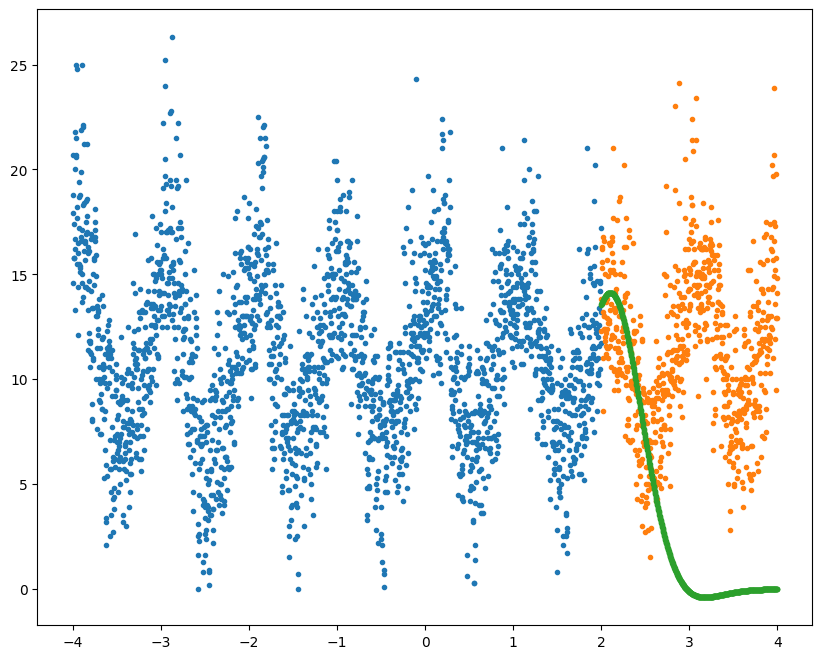

In [20]:
def mse_loss(y_preds, y):
    return 0.5 * np.mean((y - y_preds)**2)

################################# TO BE GRADED #################################

# Implement kernel regression using the RBF kernel


distances_train = np.linalg.norm(
    x_train[:, None, :] - x_train[None, :, :], axis=-1)**2
distances_test = np.linalg.norm(
    x_train[:, None, :] - x_test[None, :, :], axis=-1)**2


def predict(distances_train, distances_test, y, sigma=1, lamda=0.1):
    kernel_train = np.exp(-0.5 * distances_train / sigma**2)
    kernel_test = np.exp(-0.5 * distances_test / sigma**2)

    return y.T @ np.linalg.pinv(kernel_train + lamda * np.identity(kernel_train.shape[0])) @ kernel_test


losses = np.array([[sigma, reg, mse_loss(y_test, predict(distances_train, distances_test,
                  y_train, sigma, reg))] for sigma in [0.1, 0.5, 1] for reg in [1e-2, 5e-2, 1e-1]])

opt_test_loss_arg = np.argmin(losses[:, 2])

predictions = predict(distances_train, distances_test, y_train,
                      sigma=losses[opt_test_loss_arg, 0], lamda=losses[opt_test_loss_arg, 1])

# Plot the predictions on top of the above figure

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.scatter(x_train, y_train, label='train', marker='.')
ax.scatter(x_test, y_test, label='test', marker='.')
ax.scatter(x_test, predictions, label='predict', marker='.')

# ax = sns.scatterplot(x = 'years_since_19850101', y = 'temp_deg_C', data = df_train, label = 'train', marker = '.')
# ax = sns.scatterplot(x = 'years_since_19850101', y = 'temp_deg_C', data = df_test, label = 'test', marker = '.')
# ax = sns.scatterplot(x_test, predictions, label = 'predict', marker = '.')

# report the best test loss obtained by varying the bandwidth and regularization strength.

opt_test_loss = losses[opt_test_loss_arg, 2]
print(losses)

print(f'Optimal test loss: {opt_test_loss:0.4f}')
print(
    f'Optimal parameters: sigma {losses[opt_test_loss_arg, 0]}, lambda {losses[opt_test_loss_arg, 1]}')

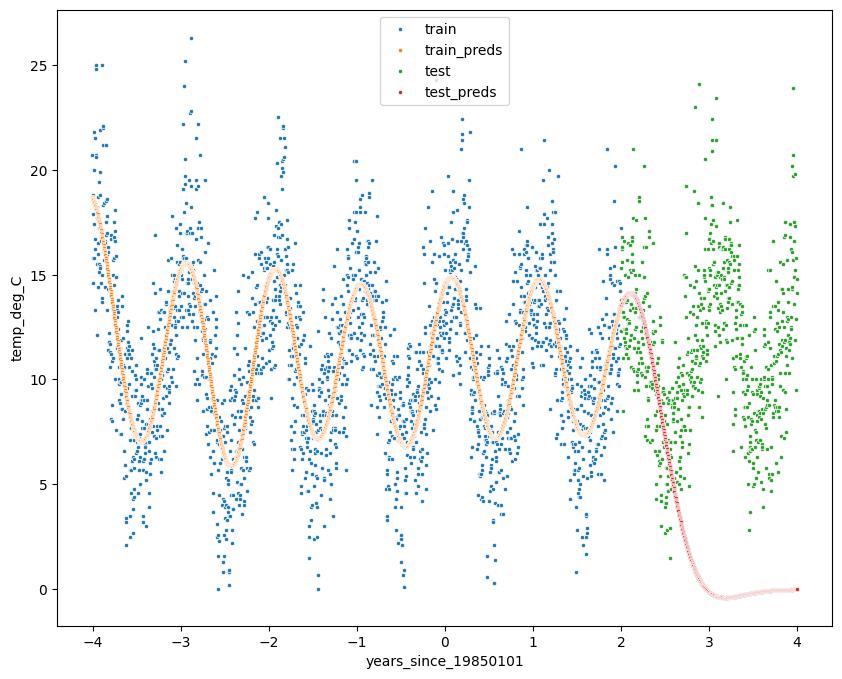

In [ ]:
predictions_train = predict(distances_train, distances_train, y_train,
                            sigma=losses[opt_test_loss_arg, 0], lamda=losses[opt_test_loss_arg, 1])

predictions_test = predict(distances_train, distances_test, y_train,
                           sigma=losses[opt_test_loss_arg, 0], lamda=losses[opt_test_loss_arg, 1])

df_train['preds'] = predictions_train
df_test['preds'] = predictions_test


fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax = sns.scatterplot(x='years_since_19850101', y='temp_deg_C',
                     data=df_train, label='train', marker='.')
ax = sns.scatterplot(x='years_since_19850101', y='preds',
                     data=df_train, label='train_preds', marker='.')

ax = sns.scatterplot(x='years_since_19850101', y='temp_deg_C',
                     data=df_test, label='test', marker='.')
ax = sns.scatterplot(x='years_since_19850101', y='preds',
                     data=df_test, label='test_preds', marker='.')

ax.legend()

#### scikit-learn

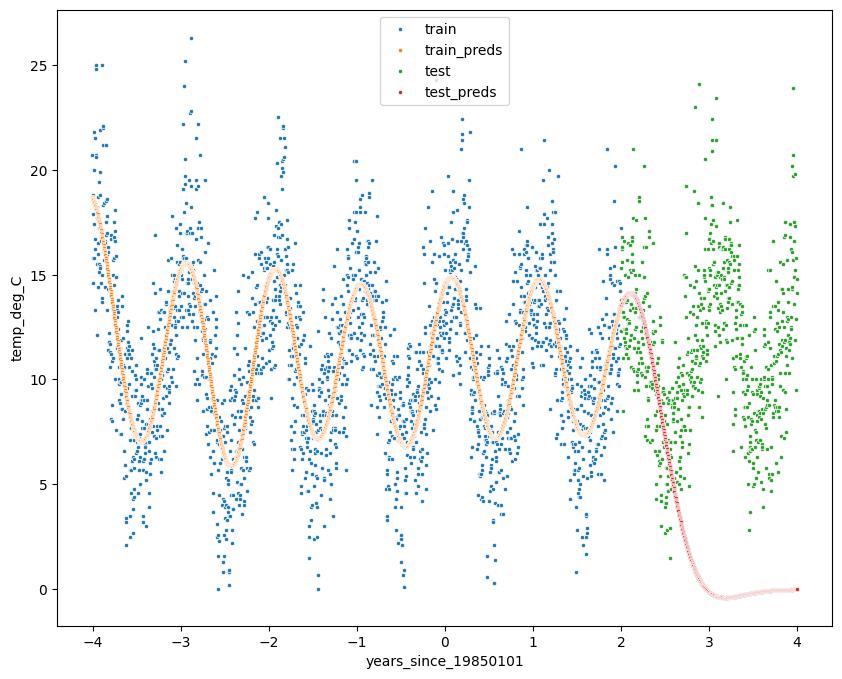

In [22]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process.kernels import RBF

kernel_ridge = KernelRidge(kernel=RBF(length_scale=0.5), alpha=0.1)
kernel_ridge.fit(x_train, y_train)

df_train['preds'] = predictions_train
df_test['preds'] = predictions_test


fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax = sns.scatterplot(x='years_since_19850101', y='temp_deg_C',
                     data=df_train, label='train', marker='.')
ax = sns.scatterplot(x='years_since_19850101', y='preds',
                     data=df_train, label='train_preds', marker='.')

ax = sns.scatterplot(x='years_since_19850101', y='temp_deg_C',
                     data=df_test, label='test', marker='.')
ax = sns.scatterplot(x='years_since_19850101', y='preds',
                     data=df_test, label='test_preds', marker='.')

ax.legend()